# Churn Prediction of Telco Customers 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("B:\\work\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
len(df)

7043

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.drop(['customerID'],axis = 1 ,inplace = True)

## Exploratory analysis
**Let find the categorical vs numerical features**

In [9]:
df_cat =  df.select_dtypes(exclude = ['number', 'bool_','float_'])

In [10]:
df_cat.head()

# Below is a categorical data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [11]:
# Below we can see numerical data
df_num = df.select_dtypes(exclude = ['bool_','object_'])


In [12]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


### Replace Text columns to integers

In [13]:
df.gender =  [1 if each == 'Male' else 0 for each in df.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == 'Yes' else 0 if each == 'No' else -1 for each in df[item]]
    

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.014418,-0.012230,-0.004720,-0.009409,-0.008673,-0.010011,-0.011754,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,0.156530,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,-0.014877,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,-0.111377,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.006152,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.016505,0.247398,0.011942
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.133255,0.490700,0.036310
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.184993,0.635534,0.023309
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,0.260715,0.710477,0.074205
DeviceProtection,-0.004720,0.140298,0.098664,-0.069078,0.253999,-0.142012,0.124502,0.701690,0.711335,1.000000,0.725327,0.748182,0.752952,0.246069,0.737104,0.084654


## Let's look at the distribution of Churn values. As you can see below, the data set is imbalanced. But for now, I will ignore this.

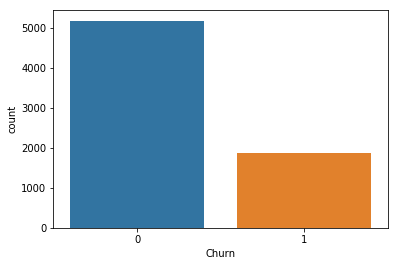

In [16]:
sns.countplot(x = 'Churn', data = df)

In [17]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(15), object(3)
memory usage: 1.4+ MB


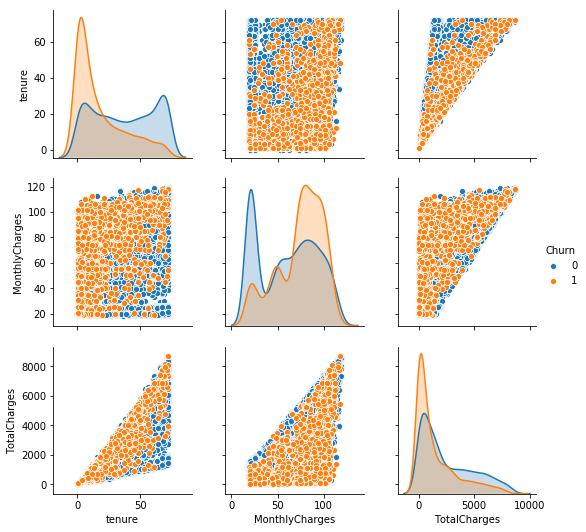

In [18]:
sns.pairplot(df, vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

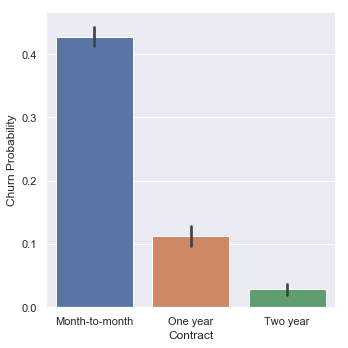

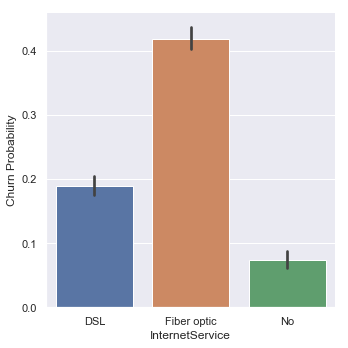

In [19]:
sns.set(style="darkgrid")
g1=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
g2.set_ylabels("Churn Probability")

In [20]:
# Remaining features coversion
df = pd.get_dummies(data = df)

In [313]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Let's see the correlation between churn and the remaining columns

In [22]:
df.corr()['Churn'].sort_values()

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.199484
Contract_One year                         -0.177820
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
gender                                    -0.008612
PhoneService                               0.011942
OnlineSecurity                             0.023309
TechSupport                                0.027037
MultipleLines                              0.036310
OnlineBackup                               0.074205
DeviceProtection                           0.084654
SeniorCitizen                              0.150889
StreamingMov

**Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.**

# Build a model

0    0.73463
1    0.26537
Name: Churn, dtype: float64

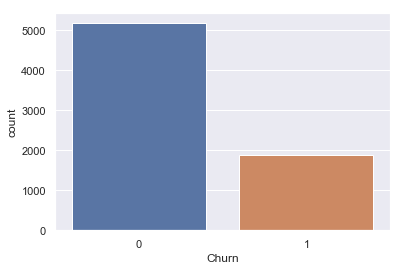

In [23]:
sns.countplot(x = 'Churn', data = df)
df['Churn'].value_counts()/len(df)

**Here we can says taht data us inbalanced, so we want to do normalization**

> Prepare x and y

> First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. Also, apply normalization to x in order to scale all values between 0 and 1.

In [33]:
df.dropna(inplace=True)

In [34]:
#assign Class_att column as y attribute
y = df.Churn.values

#drop Class_att column, remain only numerical columns
new_data = df.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

### Split Train and Split

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

**Apply Machine Learning Algorithms**

In [ ]:
# Logistic Regression
# KNN
# SVM
# RandomForest
# Decision Tree
# Navie Baye's

>##                           Logistic Regression

In [79]:
                          # LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
Accuracy_lr = LR_model.score(x_test,y_test)

In [80]:
print("Logistic Regression accuracy is :",Accuracy_lr)

Logistic Regression accuracy is : 0.7976303317535545


## Maximum likehood estimaton

In [104]:
y_pred_train = LR_model.predict_proba(x_train)
y_pred_train_1 = y_pred_train[:,1]

In [105]:
y_pred_train_1

array([0.34013473, 0.08890075, 0.36817593, ..., 0.58137642, 0.01555734,
       0.59670744])

In [111]:
from sklearn.metrics import log_loss
class thershold():
    def __init__(self):
        self.th = 0.5    # Thershold values
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0
            

In [113]:
y_pred_train_prob_1 = y_pred_train_1
probabilites = np.linspace(0,1,100)
pre = thershold()
mle = []
for p in probabilites:
    pre.th = p
    yy = pd.Series(y_pred_train_prob_1)
    y_pred_0_5= yy.apply(pre.predict_threshold) #predict_threshold is funtion see above Class
    loss = log_loss(y_train,y_pred_0_5)
    mle.append(loss)

thereshold probabilty value= 0.5555555555555556


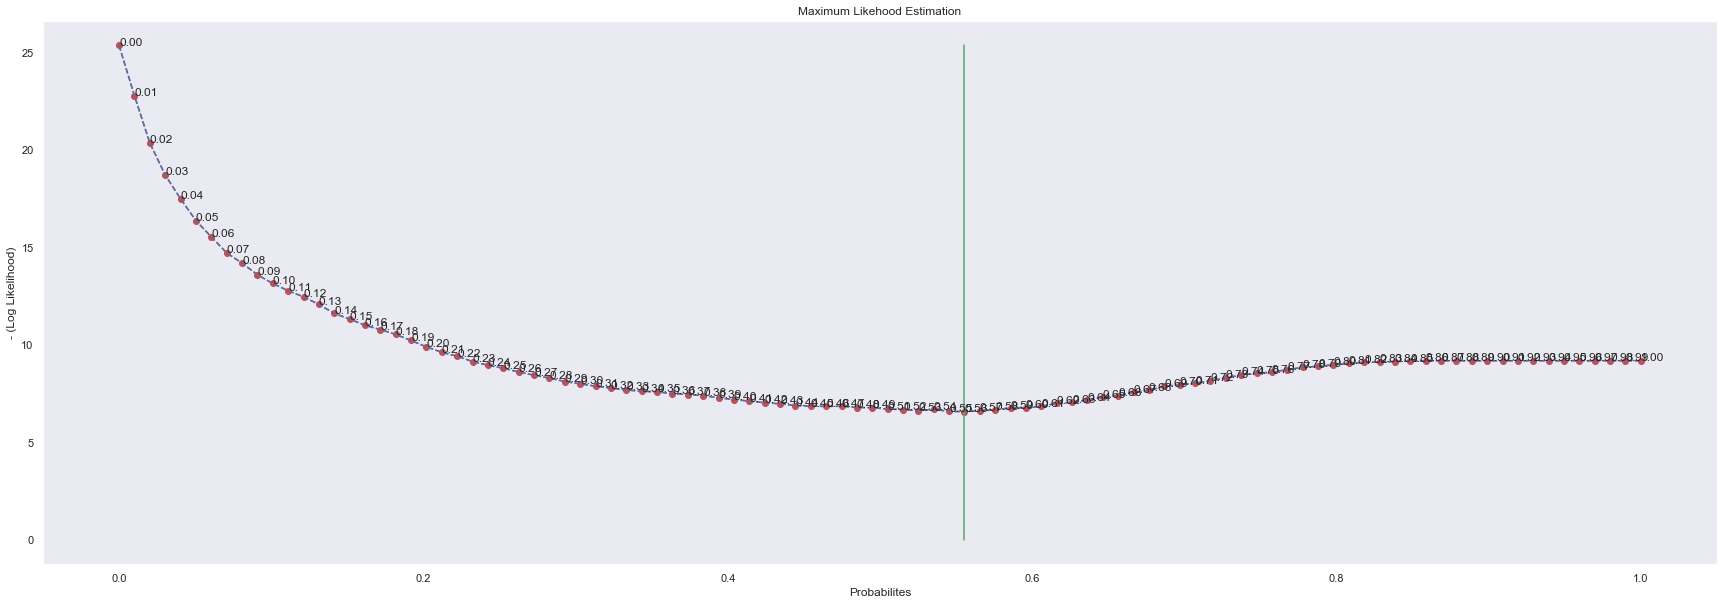

In [114]:
# Visualize
plt.figure(figsize = (30,10))
plt.plot(probabilites, mle,'ro--')
plt.plot(probabilites, mle, 'b--')
ind = np.array(mle).argmin()
mx = max(mle)
val = probabilites[ind]


print('thereshold probabilty value=', val)
plt.plot([val,val],[0,mx],'g')

for i,p in enumerate(probabilites):
    plt.text(probabilites[i], mle[i],'%0.2f'%(p))



plt.xlabel('Probabilites')
plt.ylabel('- (Log Likelihood)')
plt.title('Maximum Likehood Estimation')
plt.grid()
plt.show()

In [116]:
## Apply to test
y_pred_prob_test = model.predict_proba(x_test)
y_pred_prob_test_1 = y_pred_prob_test[:,1]

In [118]:
pre = thershold() # predictor class
thres_prob = 0.555 # from mle
pre.th = thres_prob # setting threshold
yy = pd.Series(y_pred_prob_test_1) # convert prob array into series
y_pred_class_test= yy.apply(pre.predict_threshold) #predict_threshold is funtion see above Class

In [119]:
y_pred_class_test

0       0
1       0
2       1
3       0
4       0
5       0
6       0
7       1
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      1
29      0
       ..
2080    0
2081    0
2082    0
2083    0
2084    0
2085    0
2086    0
2087    0
2088    0
2089    0
2090    1
2091    0
2092    0
2093    0
2094    0
2095    0
2096    0
2097    0
2098    1
2099    1
2100    0
2101    0
2102    0
2103    0
2104    0
2105    0
2106    0
2107    0
2108    0
2109    0
Length: 2110, dtype: int64

In [120]:
Accuracy_lr = LR_model.score(x_test,y_pred_class_test)

In [121]:
print("Logistic Regression accuracy is :",Accuracy_lr)

Logistic Regression accuracy is : 0.8914691943127963


> ## Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
Accuracy_RF = RF_model.score(x_test, y_test)

In [129]:
print("Random Forest accuracy is :", Accuracy_RF)

Random Forest accuracy is : 0.7725118483412322


**## Apply GreedSearch method ---> Hyper parameteric tunning**

In [130]:
from sklearn.model_selection import GridSearchCV

In [132]:
model_tune =RandomForestClassifier()

In [147]:
# TUNNING PARAMETRES
 
tunning_Parameters = {
    'n_estimators' : [10,30,40,100,200],
    'criterion' : ['gini','entropy'],
    'max_depth': [5,9,10,15,17,19],
    'max_features' :  ['sqrt','log2']
    
             
}

In [148]:
clf = GridSearchCV(model_tune, param_grid= tunning_Parameters, cv =5 )

In [149]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [150]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 40}

In [151]:
clf.best_score_

0.8049573344169036

In [156]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(criterion= 'gini',max_depth= 10,max_features= 'sqrt',n_estimators= 40)
RF_model.fit(x_train, y_train)
Accuracy_RF = RF_model.score(x_test, y_test)

In [157]:
print("Random Forest accuracy is :", Accuracy_RF)

Random Forest accuracy is : 0.7914691943127962


> ## SVM  

In [158]:
from sklearn.svm import SVC

In [170]:
svc_model = SVC(kernel='linear',) 
# Kernals = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)


In [171]:
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7909952606635071


> ## KNeighborsClassifier

In [172]:
from sklearn.neighbors import KNeighborsClassifier


In [175]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

accuracy_knn = knn_model.score(x_test,y_test)


In [176]:
print("KNN accuracy  is :",accuracy_knn)

KNN accuracy  is : 0.7540284360189573


**Apply GreedSearch method ---> Hyper parameteric tunning**

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
model_tune =KNeighborsClassifier()

In [199]:
# TUNNING PARAMETRES
 
tunning_Parameters = {
    'n_neighbors' : [5,7,9,11,13,15],
    'metric' : ['euclidean','minkowski','manhattan'],
    'p' : [1,2]
}

In [200]:
clf = GridSearchCV(model_tune, param_grid= tunning_Parameters)

In [201]:
clf.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [202]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'p': 1}

In [203]:
clf.best_score_

0.7895164567249086

In [214]:
knn_model = KNeighborsClassifier(metric= 'euclidean', n_neighbors  = 13, p =1)
knn_model.fit(x_train,y_train)

accuracy_knn = knn_model.score(x_test,y_test)


In [215]:
print("Accuracy for KNN with n-neighboures N =13", accuracy_knn)

Accuracy for KNN with n-neighboures N =13 0.7668246445497631


> ## Naive Bayes Classification

In [217]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
accuracy_nb = nb_model.score(x_test,y_test)

In [218]:
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7090047393364929


> ## Decision Tree Classification

In [219]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.728436018957346


#### GridSearch CV (cv----> Cross validation)
- its a tunning method
- Hyperparameter tunning --->we dont know which method is good 
- GridSearch is used for more models, i.e svm and all algorithms we will use

In [220]:
from sklearn.model_selection import GridSearchCV #gridsearch cross  valiadation
# hyperparametre tunning

In [221]:
model_tune = DecisionTreeClassifier()

In [222]:
tunned_parameter = [{'criterion':['gini','entropy'],
                    'max_depth':range(2,20)}]

In [223]:
clf = GridSearchCV(model_tune,
                   param_grid= tunned_parameter,
                   cv=10)  # cross validation(splits) = 10
clf.fit(x_train,y_train)

# cv ----> spliting the data into 10 parts and each part contaions 70

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             pre_dis

In [224]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [225]:
clf.best_score_

0.7962210483543275

In [236]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)


In [237]:
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7772511848341233


In [242]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [243]:
export_graphviz(dt_model, 
                out_file = 'churn.odt',
                feature_names = x_train.columns,
                filled = True)

In [245]:
graph = pydotplus.graph_from_dot_file('churn.odt')

In [246]:
graph.write_pdf('churn_tree.pdf')  # writting a file to pdf

True

In [247]:
graph.write_jpg('churn_tree.jpg') # writting a file to jpg

True

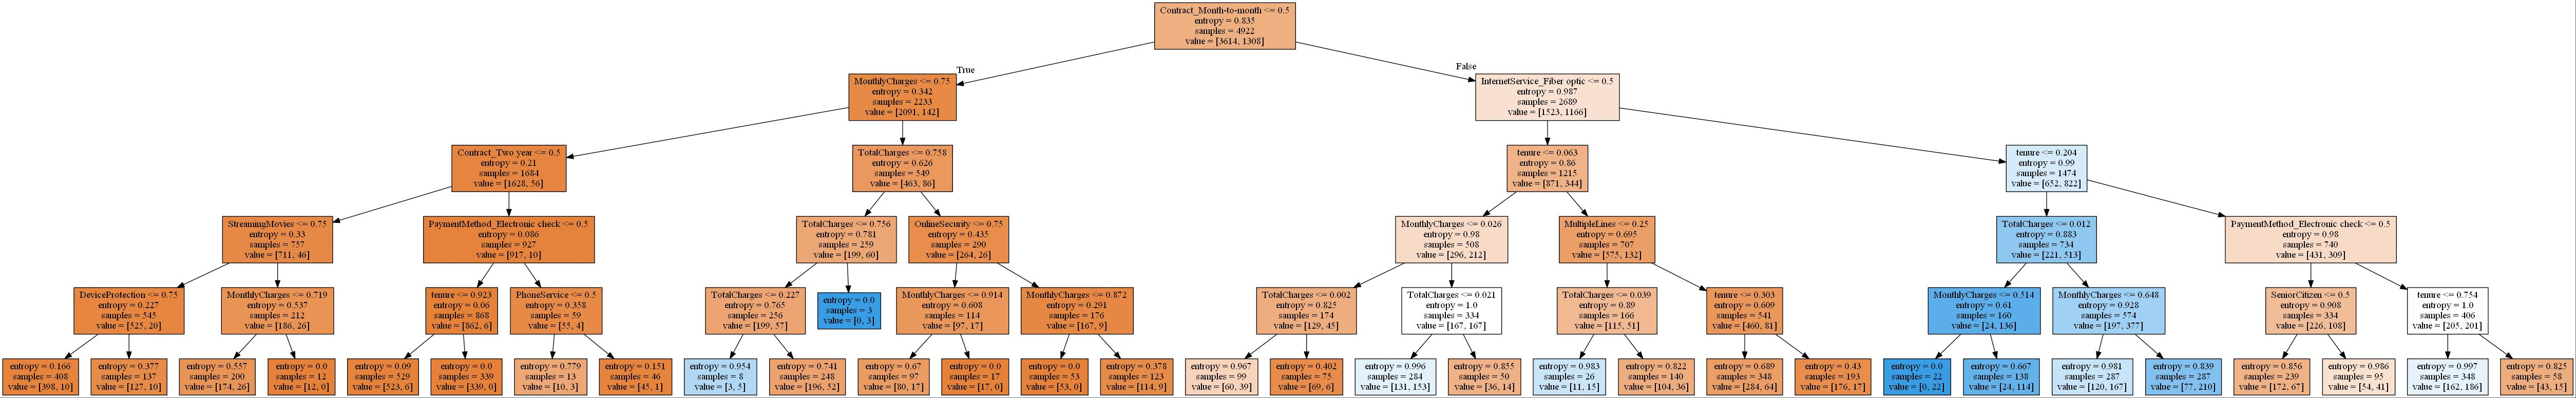

In [248]:
from IPython.display import Image
Image('churn_tree.jpg')

In [249]:
print("Logistic Regression accuracy is :",Accuracy_lr)
print("Random Forest accuracy is :", Accuracy_RF)
print("SVM accuracy is :",accuracy_svc)
print("Accuracy for KNN with n-neighboures N =13", accuracy_knn)
print("Naive Bayes accuracy is :",accuracy_nb)
print("Decision Tree accuracy is :",accuracy_dt)

Logistic Regression accuracy is : 0.8914691943127963
Random Forest accuracy is : 0.7914691943127962
SVM accuracy is : 0.7909952606635071
Accuracy for KNN with n-neighboures N =13 0.7668246445497631
Naive Bayes accuracy is : 0.7090047393364929
Decision Tree accuracy is : 0.7772511848341233


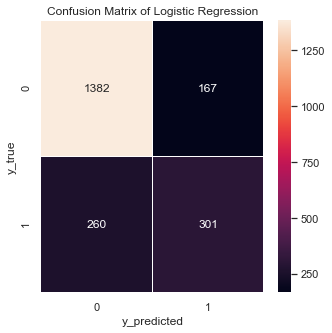

In [295]:
# %%Confusion Matrix libraries
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#for Logistic Regression
cm_lr = confusion_matrix(y_test,LR_model.predict(x_test))

# %% confusion matrix visualization

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [255]:
# True Positives
TP = cm_lr[1, 1]
# True Negatives
TN = cm_lr[0, 0]
# False Positives
FP = cm_lr[0, 1]
# False Negatives
FN = cm_lr[1, 0]

#### Classification accuracy
>**Classification accuracy is the ratio of correct predictions to the total no. of predictions.**

In [260]:
Accuracy = (TP + TN) / float(TP + TN + FP + FN)
print(" Accuracy",Accuracy )

 Accuracy 0.7976303317535545


#### Sensitivity/Recall
> **Sensitivity or recall is the ratio of correct positive predictions to the total no. of positive predictions. Or more simply, how sensitive the classifier is for detecting positive instances. This is also called the True Positive Rate.**


In [264]:
recall_score = TP / float(TP + FN)
print("recall_score",recall_score)

recall_score 0.5365418894830659


#### Specificity
>**Specificity is the ratio of correct negative predictions to the total no. of negative predictions. This determines how specific the classifier is in predicting positive instances.**

In [267]:
specificity = TN / float(TN + FP)
print("specificity : ", specificity)

specificity :  0.8921885087153002


#### False Positive Rate
> **The false positive rate is the ratio of negative predictions that were determined to be positive to the total number of negative predictions. Or, when the actual value is negative, how often is the prediction incorrect.**

In [266]:
False_Positive_Rate = FP / float(TN + FP)
print("False_Positive_Rate :", False_Positive_Rate)

False_Positive_Rate : 0.1078114912846998


#### Precision
> **Precision is the ratio of correct predictions to the total no. of predicted correct predictions. This measures how precise the classifier is when predicting positive instances.**

In [268]:
precision_score = TP / float(TP + FP)
print("precision_score :", precision_score)

precision_score : 0.6431623931623932


In [280]:
print("precision_score :", precision_score.round(3))
print("recall_score    :", recall_score.round(3))
print("specificity     :",specificity.round(3))
print("False_Positive  :", False_Positive_Rate.round(3))

precision_score : 0.643
recall_score    : 0.537
specificity     : 0.892
False_Positive  : 0.108


In [299]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [312]:
print_scores("..............Logistic Regression..............\n",y_test, LR_model.predict(x_test))
print("\n")
print_scores("..............SVC..............\n",y_test, svc_model.predict(x_test))
print("\n")
print_scores("..............KNN..............\n",y_test, knn_model.predict(x_test))
print("\n")
print_scores("..............Naive Bayes..............\n",y_test, nb_model.predict(x_test))
print("\n")
print_scores("..............Decision Tree..............\n",y_test, dt_model.predict(x_test))
print("\n")
print_scores("..............Random Forest..............\n",y_test, RF_model.predict(x_test))

..............Logistic Regression..............

accuracy:  0.7976303317535545
precision:  0.6431623931623932
recall:  0.5365418894830659
f1_score:  0.7914343249883478


..............SVC..............

accuracy:  0.7909952606635071
precision:  0.6260504201680672
recall:  0.5311942959001783
f1_score:  0.7852201622846178


..............KNN..............

accuracy:  0.7668246445497631
precision:  0.5664739884393064
recall:  0.5240641711229946
f1_score:  0.7638501323190551


..............Naive Bayes..............

accuracy:  0.7090047393364929
precision:  0.472193074501574
recall:  0.8021390374331551
f1_score:  0.7255992547631772


..............Decision Tree..............

accuracy:  0.7772511848341233
precision:  0.5742251223491027
recall:  0.6274509803921569
f1_score:  0.7802829572627205


..............Random Forest..............

accuracy:  0.7914691943127962
precision:  0.631236442516269
recall:  0.5187165775401069
f1_score:  0.7845274316471722


#### CONCLUSION

> * Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
> * Logistic Regression gives the highest F1 Score, so it is the best model.
> * Naive Bayes is the worst model because it gives the lowest F1 score.
> * Sex has no impact on churn.
> * People having month-to-month contract tend to churn more than people having long term conracts.
> * As the tenure increases, the probability of churn decreases.
> * As tmonthly charges increases, the probability of churn increases.